In [92]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn. metrics import classification_report, roc_auc_score, roc_curve
import pickle
import streamlit as st
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [93]:
# 1. Read data
data = pd.read_csv("spam.csv", encoding='latin-1')

In [94]:
# 2. Data pre-processing
source = data['v2']
target = data['v1']
# ham = 0, spam = 1
target = target.replace("ham", 0)
target = target.replace("spam", 1)

text_data = np.array(source)

count = CountVectorizer(max_features=6000)
count.fit(text_data)
bag_of_words = count.transform(text_data)

X = bag_of_words.toarray()

y = np.array(target)

TypeError: 'module' object is not callable

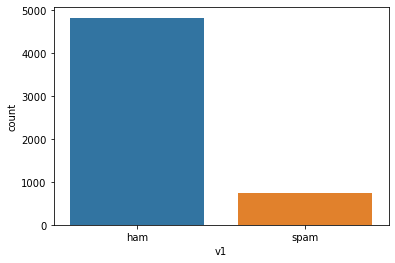

In [95]:
fig1 = sns.countplot(data=data[["v1"]], x="v1")
plt(fig1.figure)

In [96]:
# Word Cloud Generation
df_spam  = data[data.v1 == 'spam'].copy()
df_ham = data[data.v1 == 'ham'].copy()
import wordcloud

def generate_wordcloud(data_frame, v1):
    text = ' '.join(data_frame['v2'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(v1, fontsize=20 )
    plt.show()

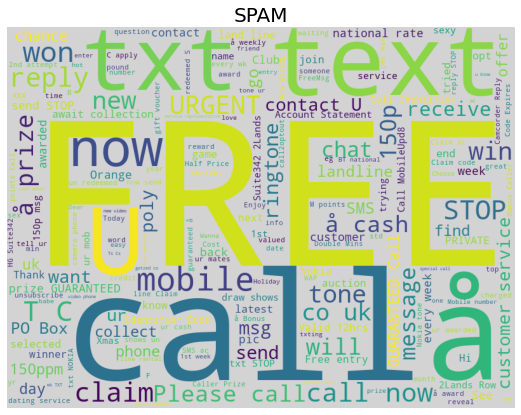

In [97]:
generate_wordcloud(df_spam, 'SPAM')

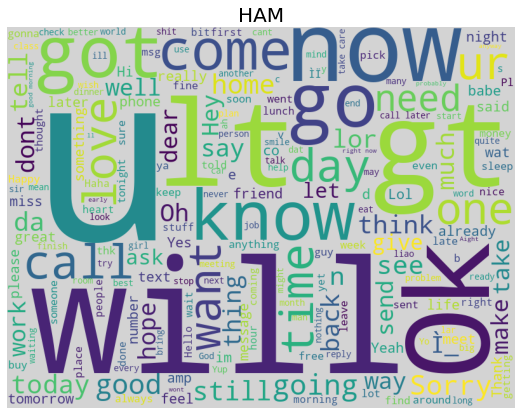

In [98]:
generate_wordcloud(df_ham, 'HAM')

In [99]:
# 3. Build ML model

In [100]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) 

In [101]:
#Support vector Machine
from sklearn.svm import SVC
svm_model = SVC(kernel = 'rbf', random_state = 0)
svm_model.fit(X_train, y_train)
print("SVM Model Accuracy")
print(svm_model.score(X_test,y_test))

SVM Model Accuracy
0.9757847533632287


In [102]:
#Logistic Regrsssion
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression(solver='liblinear', penalty='l1')
lg_model.fit(X_train, y_train)
print("Logistic Regrsssion Model Accuracy")
print(lg_model.score(X_test,y_test))

Logistic Regrsssion Model Accuracy
0.9757847533632287


In [103]:
# Naive Bayes model
clf = MultinomialNB()
model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [104]:
#4. Evaluate model
score_train = model.score(X_train,y_train)
score_test = model.score(X_test,y_test)
acc = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

cr = classification_report(y_test, y_pred)

y_prob = model.predict_proba(X_test)
roc = roc_auc_score(y_test, y_prob[:, 1])

In [105]:
print("Accuracy:")
print("Train Score:",round(score_train,4))
print("Train Score:",round(score_test,4))
print("Accuracy:",round(acc,4))
print("ROC Accuracy:",round(roc,4))
print(" ")
print("confusion Matrix:")
print(cm)

Accuracy:
Train Score: 0.9926
Train Score: 0.9874
Accuracy: 0.9874
ROC Accuracy: 0.9906
 
confusion Matrix:
[[944   5]
 [  9 157]]


In [106]:
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       949
           1       0.97      0.95      0.96       166

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

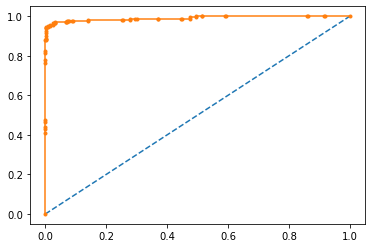

In [107]:
# Calculate ROC Curve
fpr, tpr, threholds = roc_curve(y_test, y_prob[:, 1])
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle="--")
ax.plot(fpr, tpr, marker=".")
st.pyplot(fig)

In [108]:
#Deep Learning Model

In [109]:
# Importing libraries for model building and predictions

# for model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

# for text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# split data into train and test set
from sklearn.model_selection import train_test_split

In [110]:
data['v1'] = data['v1'].map( 
    {'spam': 1, 'ham': 0} )

In [111]:
# Splitting dataset for training and test

X = data['v2'].values
y = data['v1'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [112]:
# prepare tokenizer

token = Tokenizer()
token.fit_on_texts(X_train)

In [113]:
encoded_train = token.texts_to_sequences(X_train)
encoded_test = token.texts_to_sequences(X_test)
print(encoded_train[0:2])

[[38, 30, 8, 5, 273, 1989, 81, 116, 26, 11, 1656, 322, 10, 53, 18, 299, 30, 349, 1990], [799, 15, 2555, 1442, 1127, 192, 2556, 171, 12, 98, 1991, 44, 195, 1657, 2557, 1992, 2558, 21, 9, 4, 203, 1025, 225]]


In [ ]:
# pad documents to a max length of 8words
max_length = 8

padded_train = pad_sequences(encoded_train, maxlen = max_length, padding = 'post')
padded_test = pad_sequences(encoded_test, maxlen = max_length, padding = 'post')

print(padded_train)

In [79]:
vocab_size = len(token.word_index) + 1

# define the model
model = Sequential()
model.add(Embedding(vocab_size, 24, input_length = max_length))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

# summarize the model
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 8, 24)             190920    
                                                                 
 flatten_2 (Flatten)         (None, 192)               0         
                                                                 
 dense_8 (Dense)             (None, 500)               96500     
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 1)                

In [81]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)

# fit the model
model.fit(x = padded_train,
          y = y_train,
          epochs = 10,
          validation_data = (padded_test, y_test),
          verbose=1,
          callbacks=[early_stop])

Epoch 1/10
140/140 [==============================] - 1s 5ms/step - loss: 6.2215e-10 - accuracy: 1.0000 - val_loss: 0.3536 - val_accuracy: 0.9803
Epoch 2/10
140/140 [==============================] - 1s 4ms/step - loss: 2.7415e-09 - accuracy: 1.0000 - val_loss: 0.3377 - val_accuracy: 0.9803
Epoch 3/10
140/140 [==============================] - 1s 4ms/step - loss: 2.3174e-10 - accuracy: 1.0000 - val_loss: 0.3482 - val_accuracy: 0.9803
Epoch 4/10
140/140 [==============================] - 1s 4ms/step - loss: 2.1022e-10 - accuracy: 1.0000 - val_loss: 0.3560 - val_accuracy: 0.9803
Epoch 5/10
140/140 [==============================] - 1s 4ms/step - loss: 4.8050e-10 - accuracy: 1.0000 - val_loss: 0.3693 - val_accuracy: 0.9803
Epoch 6/10
140/140 [==============================] - 1s 4ms/step - loss: 1.5385e-10 - accuracy: 1.0000 - val_loss: 0.3748 - val_accuracy: 0.9803
Epoch 7/10
140/140 [==============================] - 1s 4ms/step - loss: 1.4495e-10 - accuracy: 1.0000 - val_loss: 0.3742 -

In [82]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : "+ str(acc_sc))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, 
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

In [83]:
preds = (model.predict(padded_test) > 0.5).astype("int32")

35/35 [==============================] - 0s 2ms/step


In [84]:
c_report(y_test, preds)

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy : 0.9811659192825112


0.9811659192825112

In [85]:
accuracy_score(y_test, preds)

0.9811659192825112

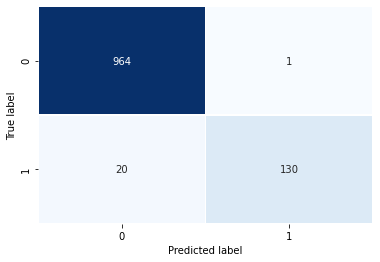

In [86]:
plot_confusion_matrix(y_test, preds)

In [87]:
model.save("spam_model")

2023-01-11 22:14:55.593 Assets written to: spam_model\assets


In [88]:
import tensorflow as tf

s_model = tf.keras.models.load_model("spam_model")
with open('spam_model/tokenizer.pkl', 'rb') as input:
    tokenizer = pickle.load(input)

In [89]:
sms = ["Hi, I'll be late, lets check this tomorrow "]
sms_proc = token.texts_to_sequences(sms)
sms_proc = pad_sequences(sms_proc, maxlen=max_length, padding='post')
pred = (model.predict(sms_proc) > 0.5).astype("int32").item()
print(pred)

1/1 [==============================] - 0s 21ms/step
0


In [90]:
sms = ["Free entry in 2 a wkly comp to win FA Cup fina..."]
sms_proc = token.texts_to_sequences(sms)
sms_proc = pad_sequences(sms_proc, maxlen=max_length, padding='post')
pred = (model.predict(sms_proc) > 0.5).astype("int32").item()
print(pred)

1/1 [==============================] - 0s 23ms/step
0
